# Q. Write a program to cluster a set of points using K-means. Consider, K=3, clusters. Consider Euclidean distance as the distance measure. Randomly initialize a cluster mean as one of the data points. Iterate for 10 iterations. After iterations are over, print the final cluster means for each of the clusters. Use the ground truth cluster label present in the data set to compute and print the Jacquard distance of the obtained clusters with the ground truth clusters for each of the three clusters.

In [3]:
import random
import numpy as np
from sklearn.metrics import jaccard_score

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# K-means algorithm
def k_means(X, K, max_iters=10):
    # Randomly initialize centroids by selecting K points from the dataset
    centroids = X[random.sample(range(X.shape[0]), K)]
    
    for _ in range(max_iters):
        # Assign points to the nearest centroid
        clusters = [[] for _ in range(K)]
        labels = np.zeros(len(X), dtype=int)

        for idx, point in enumerate(X):
            distances = [euclidean_distance(point, c) for c in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)
            labels[idx] = cluster_idx  # Store the assigned cluster

        # Update centroids
        new_centroids = np.array([np.mean(cluster, axis=0) if len(cluster) > 0 else c 
                                  for cluster, c in zip(clusters, centroids)])

        # Stop if centroids do not change
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

# Function to compute Jaccard distance
def compute_jaccard(true_labels, pred_labels, K):
    jaccard_distances = []
    for i in range(K):
        # Create binary labels for the current cluster (one-vs-all approach)
        true_binary = (true_labels == i).astype(int)
        pred_binary = (pred_labels == i).astype(int)
        # Compute Jaccard similarity and distance
        jaccard_sim = jaccard_score(true_binary, pred_binary)
        jaccard_dist = 1 - jaccard_sim  # Jaccard distance = 1 - Jaccard similarity
        jaccard_distances.append(jaccard_dist)
    return jaccard_distances

# Example usage
if __name__ == "__main__":
    # Example dataset with 9 points and their ground truth labels
    X = np.array([[1, 2], [2, 1], [3, 2],  # Cluster 0
                  [8, 8], [7, 9], [9, 8],  # Cluster 1
                  [5, 4], [6, 5], [5, 5]])  # Cluster 2
    true_labels = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])  # Ground truth labels

    K = 3  # Number of clusters
    centroids, pred_labels = k_means(X, K)

    print("Final Cluster Means:")
    for i, centroid in enumerate(centroids):
        print(f"Cluster {i + 1}: {centroid}")

    # Calculate Jaccard distances for each cluster
    jaccard_distances = compute_jaccard(true_labels, pred_labels, K)

    print("\nJaccard Distances for each cluster:")
    for i, dist in enumerate(jaccard_distances):
        print(f"Cluster {i + 1}: {dist:.4f}")


Final Cluster Means:
Cluster 1: [7.5 8.5]
Cluster 2: [9. 8.]
Cluster 3: [3.66666667 3.16666667]

Jaccard Distances for each cluster:
Cluster 1: 1.0000
Cluster 2: 0.6667
Cluster 3: 0.5000


Final Centroids:
Centroid 1: [26.          5.04509804  3.41372549  1.52745098  0.26666667]
Centroid 2: [76.5    5.922  2.772  4.286  1.348]
Centroid 3: [126.           6.59387755   2.96734694   5.54285714   2.01632653]
Jaccard distance for Cluster 1: 0.019607843137254943
Jaccard distance for Cluster 2: 0.039215686274509776
Jaccard distance for Cluster 3: 0.020000000000000018


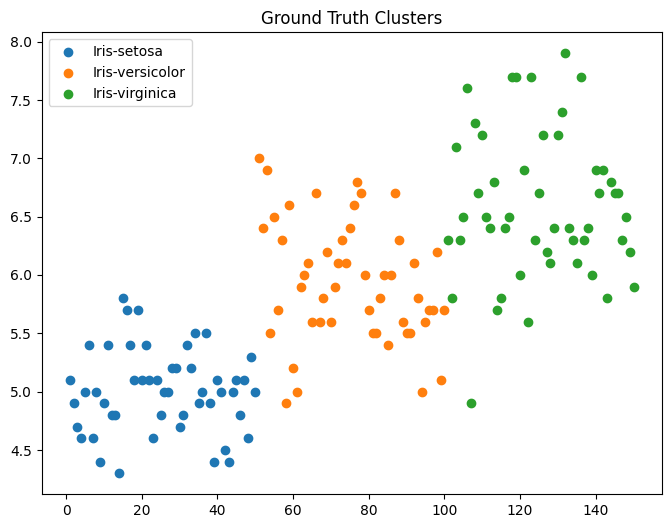

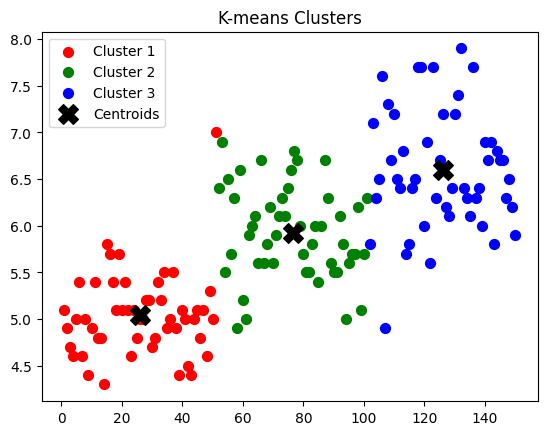

In [58]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# K-means algorithm with specified iterations and K=3
def k_means(X, K=3, iterations=10):
    centroids = X[random.sample(range(X.shape[0]), K)]  # Randomly initialize centroids

    for _ in range(iterations):
        clusters = [[] for _ in range(K)]  # Store points assigned to each cluster
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)  # Nearest centroid index
            clusters[cluster_idx].append(point)

        centroids = [np.mean(cluster, axis=0) if len(cluster) > 0 else centroids[i]
                     for i, cluster in enumerate(clusters)]  # Update centroids
    return centroids, clusters

# Function to compute Jaccard distance between two sets
def jaccard_distance(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return 1 - intersection / union

# Load the Iris dataset
df = pd.read_csv("Iris.csv")
X = df.iloc[:, :-1].values  # Extract feature columns
ground_truth = df.iloc[:, -1].values  # Extract labels

# Map ground truth labels to integers
ground_truth_map = {label: idx for idx, label in enumerate(np.unique(ground_truth))}
ground_truth_labels = np.array([ground_truth_map[label] for label in ground_truth])

# Perform K-means clustering
centroids, clusters = k_means(X, K=3, iterations=10)

# Print final centroids
print("Final Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: {centroid}")

# Compare clusters with ground truth using Jaccard distance
for i, cluster in enumerate(clusters):
    obtained_cluster = set([np.where(np.all(X == point, axis=1))[0][0] for point in cluster])
    ground_truth_cluster = set(np.where(ground_truth_labels == i)[0])
    jaccard_dist = jaccard_distance(obtained_cluster, ground_truth_cluster)
    print(f"Jaccard distance for Cluster {i+1}: {jaccard_dist}")

# Plotting function for clusters and centroids
def plot_clusters(X, clusters, centroids, title):
    colors = ['r', 'g', 'b']  # Color for each cluster
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], s=50, color=colors[i], label=f'Cluster {i+1}')
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='black', marker='X', label='Centroids')
    plt.title(title)
    plt.legend()
    plt.show()

# Visualize ground truth clusters
plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(ground_truth)):
    plt.scatter(X[ground_truth_labels == i, 0], X[ground_truth_labels == i, 1], label=label)
plt.title("Ground Truth Clusters")
plt.legend()
plt.show()

# Visualize K-means clusters
plot_clusters(X, clusters, centroids, "K-means Clusters")
